In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import yt

/home/aemerick/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [10]:
#
# Loading data
#
ds   = yt.load("DD0419/DD0419")

data = ds.all_data() # object that can used to grab ALL of the data in the simulation
                     # domain at once. yt has useful gemoetric selection objects
                     # which can be used to sub-select parts of the domain volume
                     # if, for example, you only care about stuff within a certain
                     # spherical / cylindrical volume around the center of the galaxy.
                
# in my simulations, the galaxy center position is located at the domain center
#
gal_center = ds.domain_center

#
# this prints general info about the hierarchy of the simulation
#
ds.print_stats()

# other useful things:
#   1) get the current time and convert to from code units to Myr
print(ds.current_time.to("Myr"))

# get a list of all of the fields in the simulation currently saved to disk,
# including particle fields:
#      print(ds.field_list)  # commenting out cause there's a lot

yt : [INFO     ] 2019-06-24 11:02:40,021 Parameters: current_time              = 418.999999698
yt : [INFO     ] 2019-06-24 11:02:40,022 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-06-24 11:02:40,023 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-06-24 11:02:40,023 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-06-24 11:02:40,024 Parameters: cosmological_simulation   = 0.0
Parsing Hierarchy : 100%|██████████| 2002/2002 [00:00<00:00, 6146.13it/s]
yt : [INFO     ] 2019-06-24 11:02:40,422 Gathering a field list (this may take a moment.)


level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	     1	        262144	            64
  1	    86	        147536	            53
  2	    86	        125232	            51
  3	    92	        152696	            54
  4	   105	        225168	            61
  5	   111	        264104	            65
  6	   120	        438904	            76
  7	   211	        787472	            93
  8	   399	       1442696	           113
  9	   791	       2826216	           142
----------------------------------------------
   	  2002	       6672168


t = 4.19000000e+02 = 1.32226344e+16 s = 4.19000000e+08 years

Smallest Cell:
	Width: 1.800e-06 Mpc
	Width: 1.800e+00 pc
	Width: 3.713e+05 AU
	Width: 5.554e+18 cm
418.99999969753 Myr
('all', 'birth_mass')
('all', 'creation_time')
('all', 'dynamical_time')
('all', 'metallicity_fraction')
('all', 'particle_As_fraction')
('all', 'particle_Ba_fraction')
('all', 'particle_C_fraction')
('all', 'particle_Ca_fraction')
('all', 'p

yt : [INFO     ] 2019-06-24 11:08:56,559 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-06-24 11:08:56,560 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-06-24 11:08:56,561 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-06-24 11:08:56,562 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-06-24 11:08:56,563 Making a fixed resolution buffer of (('enzo', 'HI_Density')) 800 by 800



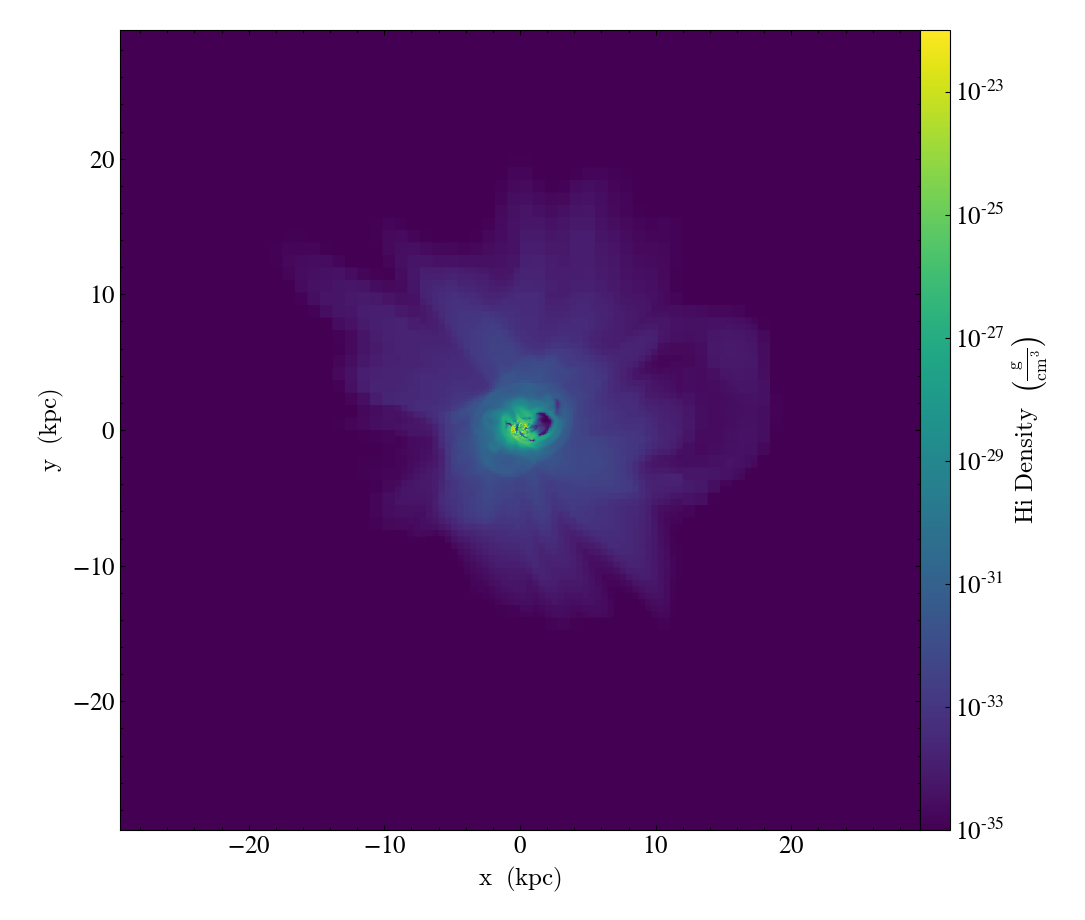

yt : [INFO     ] 2019-06-24 11:08:57,393 Making a fixed resolution buffer of (('enzo', 'HI_Density')) 800 by 800



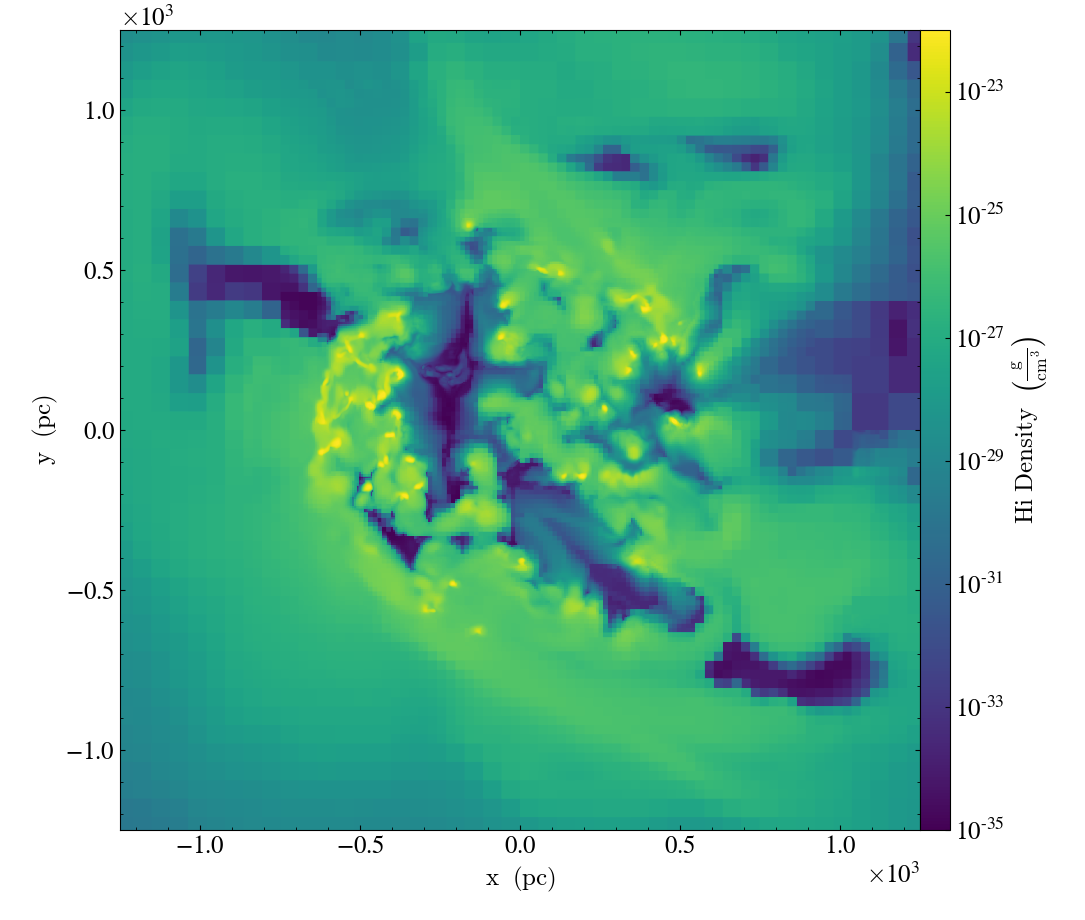

In [20]:
#
# Simple images for example purposes:
#
#    All of the species fields (HI,HII,HeI,HeII,HeIII,H2I,H2II,HM, and electrons)
#    are stored to disk as densities (e.g. 'HI_Density').
#
# Fullbox slice plot of HI Density. Face-on ('z' axis)
sp = yt.SlicePlot(ds, 'z', 'HI_Density')
sp.set_unit("HI_Density","g/cm**3")
sp.set_cmap("HI_Density","viridis")
sp.set_zlim("HI_Density",1.0E-35,1.0E-22)
sp.show()

# alternatively you can specify a width -- lets look at just the galaxy
sp.set_width(2500*yt.units.pc)
sp.show()

yt : [INFO     ] 2019-06-24 11:15:33,242 Projection completed
yt : [INFO     ] 2019-06-24 11:15:33,243 xlim = 0.478807 0.521193
yt : [INFO     ] 2019-06-24 11:15:33,244 ylim = 0.478807 0.521193
yt : [INFO     ] 2019-06-24 11:15:33,245 xlim = 0.478807 0.521193
yt : [INFO     ] 2019-06-24 11:15:33,245 ylim = 0.478807 0.521193
yt : [INFO     ] 2019-06-24 11:15:33,247 Making a fixed resolution buffer of (('gas', 'H_p0_number_density')) 800 by 800



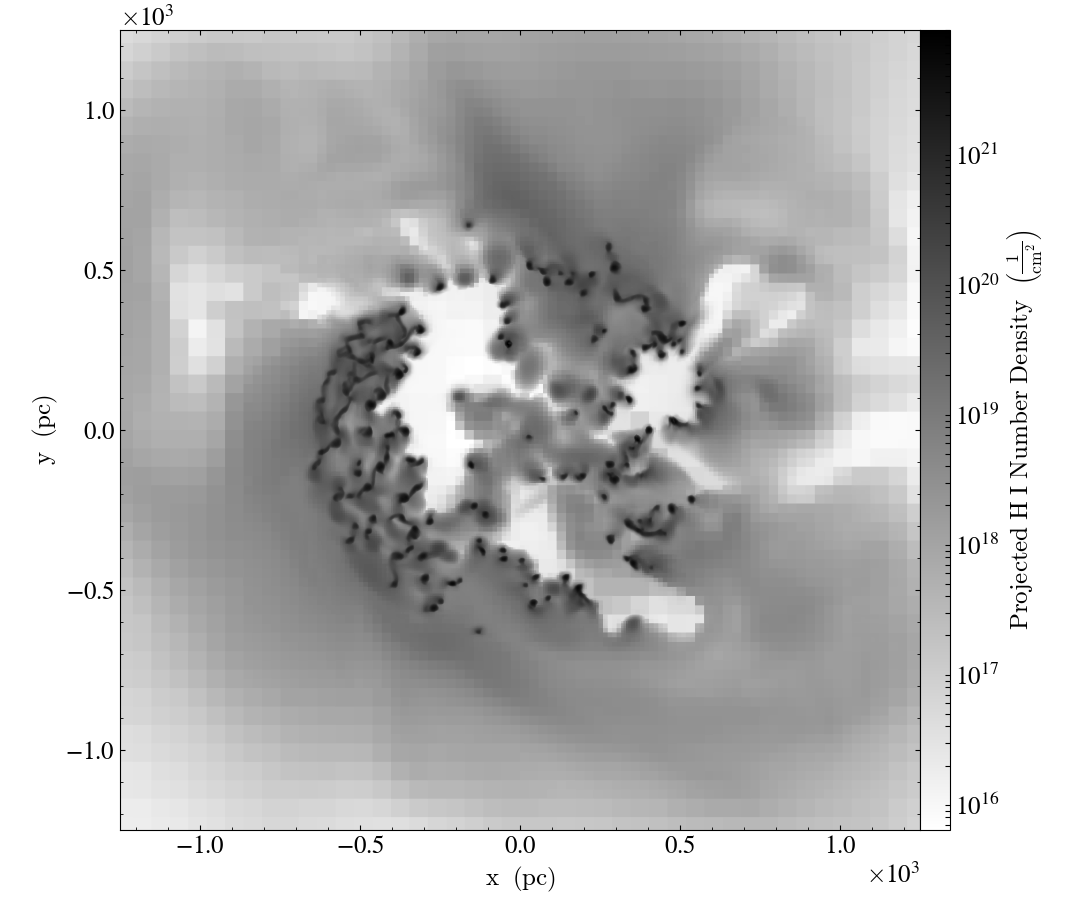

In [28]:
#
# The species fields also have pre-defined fields to look at the number density
# or mass of each in each cell (you can look at these pre-defined derived fields 
# with ds.derived_field_list , but again... its going to be quite long):
#
#  H_p0_density == same as HI_Density
#  H_p0_number_density  == HI number density
#  H_p0_mass            == HI mass
#  H_p0_fraction        ==  (HI mass in cell) / (total mass in cell)
#  H_p1_number_density  == HII number density
#  etc.

# Lets say you want to look at HI column density in the full-box:
#   (width argument just specifies viewing window... projection is still made over full box)
pp = yt.ProjectionPlot(ds, 'z', "H_p0_number_density", width = (2500,'pc'),
                           weight_field = None) # no weight = projection integrates along L.O.S.
pp.set_cmap('H_p0_number_density','gray_r')
pp.show()

In [41]:
#
# Particle data
#
#   the particle data written to disk are the fields with 'all' or 'io' as the first
#   string in the field name tuples that come out of ds.field_list
#
#   the full particle list can be accessed easily from the data object (or any of the
#   geometric selection objects in yt). For example, to grab the positions relative
#   to the galaxy center:

px = data['particle_position_x'].to('pc') - gal_center[0].to('pc')
py = data['particle_position_y'].to('pc') - gal_center[1].to('pc')
pz = data['particle_position_z'].to('pc') - gal_center[2].to('pc')

# other useful quantities:
#   current mass of particle (stars have mass-loss from winds + SN)
pmass = data['particle_mass'].to('Msun')

# birth mass:
#    this is not a standard field so it does not get units handled correctly by
#    yt, but it is stored to disk in units of Msun. To give it units just strip
#    it of the default units and multiply by the yt unit 
birthmass = (data['birth_mass'].value) * yt.units.Msun

# lifetime:
#    - yes this is a bad name, but it is what it is
lifetime   = data['dynamical_time'].to('Myr')

# creation time
creation_time = data['creation_time'].to('Myr')
# so, age:
age           = ds.current_time.to('Myr') - creation_time

# unique ID:
#    - mainly for tracking between data dumps if you need to
pid        = data['particle_index']

# metallicity:
#    - metal mass fraction (not actually metallicity... i.e. not in solar units)
pmetal     = data['metallicity_fraction']



#
# Particle Types:
#
ptypes = data['particle_type']
print(np.unique(ptypes))

# 11 = Currently "living" star of any mass (birth masses range from 1 to 100)
# 12 = White dwarf (and possibly a SNIa candidate)
# 13 = Remnant (either NS star or black hole, nothing distinguishes these two)
#             white dwarfs that when SNIa are also labelled with 13, but there
#             are only a few and can be distinguished from the above by their birth mass
#             birth_mass between 3 and 8 with type 13 are SNIa remnants 
#             birth_mass between 8 and 25 with type 13 are SNII remnants
#             birth_mass above   25 are direct collapse objects
#             birth mass below 3 should never have particle type 13


[11. 12. 13.] dimensionless


In [ ]:
# radiation fields:
#     this function can be used to generate the functions yt needs
#     to create derived fields from the fields on disk
#     this generates all of the radiation things and a couple of helper stuff
#     
#      The important ones are:
#         ('gas','G_o'): ISRF (from FUV) normalized to MW value at solar neighborhood
#         ('gas','G_eff'): The locally attenuated version of the above, (what the cells actually get to do the PE heating)
#         ('gas','FUV_flux'), (gas','LW_flux'),('gas','Q0_flux'), and (gas','Q1_flux'):
#                          the FUV, LW, HI ionizing, and HeI ionizing radiation
#                          fluxes in each cell 
#
#
# if you want these defined, you should call this function before you do yt.load
# to load data

def define_radiation_fields()

    def _pe_heating_cgs(field,data):
        pe = data[('enzo','Pe_heating_rate')].value

        energy_unit = data.ds.mass_unit * data.ds.velocity_unit**2
        pe = pe * energy_unit / data.ds.length_unit**3 / data.ds.time_unit

        return pe.convert_to_units('erg/s/cm**3')

    def _pe_heating_rate_masked(field, data):
        pe = data[('gas','Pe_heating_rate')].convert_to_units('erg/s/cm**3')

        x = 1.0 * pe

        x[data['temperature'] > data.ds.parameters['IndividualStarFUVTemperatureCutoff']] = 0.0

        return x

    def _otlwcgs(field, data):
        lw = data[('enzo','OTLW_kdissH2I')].value / data.ds.time_unit
        return lw.convert_to_units('1/s') 

    def _G_eff(field,data):
        pe  = data[('gas','Pe_heating_rate')].convert_to_units('erg/s/cm**3').value
        Z   = (data['Metal_Density'] / data['Density']).value
        n_H = (data['H_p0_number_density'] + data['H_p1_number_density'] + data['H_m1_number_density'] +\
                0.5*(data['H2_p0_number_density'] + data['H2_p1_number_density'])).convert_to_units('cm**(-3)').value

        logZ   = np.log10(Z / 0.014)
        g_to_d = np.zeros(np.shape(logZ))
        g_to_d[logZ <= -0.73] = 0.68 - 3.08*logZ[logZ <= -0.73]
        g_to_d[logZ  > -0.73] = 2.21 - 1.00*logZ[logZ  > -0.73]
        d_to_g = 1.0 / (10.0**(g_to_d))
        D = d_to_g / 6.616595E-3
        epsilon = 0.01488637246 * (n_H)**(0.235269059)
        atten = np.exp( - 1.33E-21 * D * data['dx'].convert_to_units('cm').value * n_H)
        G_eff = pe / (1.3E-24 * n_H * epsilon * D * atten)
        return G_eff * (data['Density'] / data['Density'])

    def _G_o(field,data):
        pe  = data[('gas','Pe_heating_rate')].convert_to_units('erg/s/cm**3').value
        Z   = (data['Metal_Density'] / data['Density']).value
        n_H = (data['H_p0_number_density'] + data['H_p1_number_density'] + data['H_m1_number_density'] +\
                0.5*(data['H2_p0_number_density'] + data['H2_p1_number_density'])).convert_to_units('cm**(-3)').value

        logZ   = np.log10(Z / 0.014)
        g_to_d = np.zeros(np.shape(logZ))
        g_to_d[ logZ <= -0.73] = 0.68 - 3.08*logZ[logZ <= -0.73]
        g_to_d[ logZ  > -0.73] = 2.21 - 1.00*logZ[logZ  > -0.73]
        d_to_g = 1.0 / (10.0**(g_to_d))
        D = d_to_g / 6.616595E-3

        epsilon = 0.01488637246 * (n_H)**(0.235269059)

        # atten = np.exp( - 1.33E-21 * D * data['dx'].convert_to_units('cm').value * n_H)

        G_o = pe / (1.3E-24 * n_H * epsilon * D)

        return G_o * (data['Density'] / data['Density'])


    def _FUV_flux(field, data):
        # 1.59E-3 converts from MW normalized flux density to flux dens in cgs
        G_o = data[('gas','G_o')] # relative to MW
        G   = (G_o.value * 1.59E-3) * yt.units.erg / yt.units.cm**2 /yt.units.s
        return G

    def _LW_flux(field, data):
        LW_energy = 12.8 * yt.units.eV
        H2Isigma  = 3.71E-18 * yt.units.cm**(2)

        kdissH2I = (data[('enzo','OTLW_kdissH2I')].value / data.ds.time_unit).convert_to_units('1/s')

        LW_flux = kdissH2I / H2Isigma * LW_energy

        return LW_flux.convert_to_units('erg/cm**2/s')

    def _Q0_flux(field, data):
        E_HI = 13.6 * yt.units.eV
        kph = data[('enzo','HI_kph')].convert_to_cgs()
        n   = data[('gas','H_p0_number_density')].convert_to_cgs()
        dt  = data.ds.parameters['dtPhoton']
        V   = data['cell_volume'].convert_to_cgs()
        dx  = data['dx'].convert_to_cgs()
        s   = 6.34629E-18 * yt.units.cm**(2) # cross section of HI at 13.6 eV

        tau   = s * n * dx
        denom = 1.0 - np.exp(-tau)

        Q = kph * n * V / denom  # this gives number of photons / s

        flux = Q * E_HI / dx**2

        return flux.convert_to_units('erg/cm**2/s')

    def _Q1_flux(ds,data):
        E_HeI = 24.6 * yt.units.eV
        kph = data[('enzo','HeI_kph')].convert_to_cgs()
        n   = data[('gas','H_p0_number_density')].convert_to_cgs()
        dt  = data.ds.parameters['dtPhoton']
        V   = data['cell_volume'].convert_to_cgs()
        dx  = data['dx'].convert_to_cgs()
        s   = 7.4300459E-18 * yt.units.cm**(2) # cross section of HeI at 24.6 eV

        tau   = s * n * dx
        denom = 1.0 - np.exp(-tau)

        Q = kph * n * V / denom  # this gives number of photons / s

        flux = Q * E_HeI / dx**2

        return flux.convert_to_units('erg/cm**2/s')

    yt.add_field(('gas','Pe_heating_rate'), function = _pe_heating_cgs, units = 'erg/s/cm**3')
    yt.add_field(('gas','OTLW_kdissH2I'), function = _otlwcgs, units = '1/s')
    yt.add_field(('gas','Pe_heating_rate_masked'), function = _pe_heating_rate_masked, units='erg/s/cm**3')
    yt.add_field(('gas','G_o'), function = _G_o, units = "")
    yt.add_field(('gas','G_eff'), function = _G_eff, units = "")
    yt.add_field(('gas','FUV_flux'), function = _FUV_flux, units = "erg/s/cm**2")
    yt.add_field(('gas','LW_flux'), function = _LW_flux, units = "erg/s/cm**2")
    yt.add_field(('gas','Q0_flux'), function = _Q0_flux, units = "erg/s/cm**2")
    yt.add_field(('gas','Q1_flux'), function = _Q1_flux, units = "erg/s/cm**2")  
    
    
    return